In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
v, bv = np.loadtxt('./4665/ubv.ccd',unpack=True)

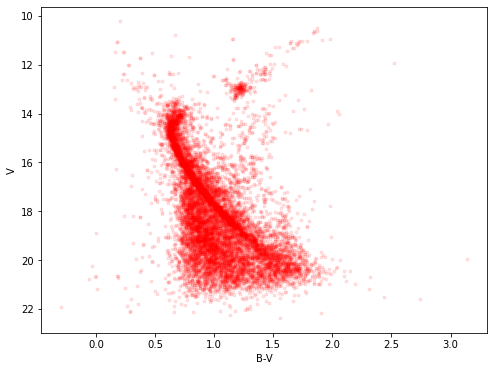

In [21]:
fig, axis = plt.subplots(figsize=(8,6))
axis.plot(bv,v,'r.',alpha=0.1)
axis.invert_yaxis()
axis.set_xlabel('B-V')
axis.set_ylabel('V')
plt.show()

In [22]:
from isochrones.dartmouth import Dartmouth_Isochrone

In [23]:
iso = Dartmouth_Isochrone(bands=['B','V'])

In [24]:
def get_isochrone(log_age, distance, ebv):
    model = iso.isochrone(log_age)
    
    model_b = model.B_mag
    model_v = model.V_mag
    # calculate B-V for this model
    model_bv = model_b - model_v
    
    distance_modulus = 5 * np.log10(distance / 10)

    model_v = model_v + distance_modulus
    # note: distance doesn't affect colour!
    
    av = 3.2 * ebv

    model_v = model_v + av
    model_bv = model_bv + ebv
    
    return (model_bv, model_v)

ADJUSTING...<br>

AGE:<br>
less --> top part UP LEFT<br>
more --> top part DOWN RIGHT

DISTANCE:<br>
less --> UP<br>
more --> DOWN

EBV:<br>
less --> LEFT<br>
more --> RIGHT

In [25]:
log_age0 = 9.235
distance0 = 2300
ebv0 = 0.2

def plot_isochrone(log_age=log_age0, dist=distance0, ebv=ebv0):
    coords = get_isochrone(log_age, dist, ebv)
    
    fig, axis = plt.subplots(figsize=(16,12))
    axis.plot(v,bv,'r.',alpha=0.1)
    axis.invert_yaxis()
    axis.set_ylabel('B-V')
    axis.set_xlabel('V')

    # now I plot the isochrone
#     axis.plot(coords[1], coords[0], color="g")
    coords = get_isochrone(log_age0, distance0, ebv0)
    axis.plot(coords[1], coords[0])

    axis.set_xlim([22,10])
    axis.set_ylim([0.0,2.0])
    plt.show()

In [26]:
import operator

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
    np.random.seed(0)
    # x = 2 - 3 * np.random.normal(0, 1, 20)
    # y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
    x = v
    y = bv

    # transforming the data to include another axis
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]

    polynomial_features = PolynomialFeatures(degree=15)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print("RMSE = " + str(rmse))
    print("R^2 = " + str(r2))
    
    return (x, y_poly_pred)

RMSE = 0.24127953045981934
R^2 = 0.3291839556751279


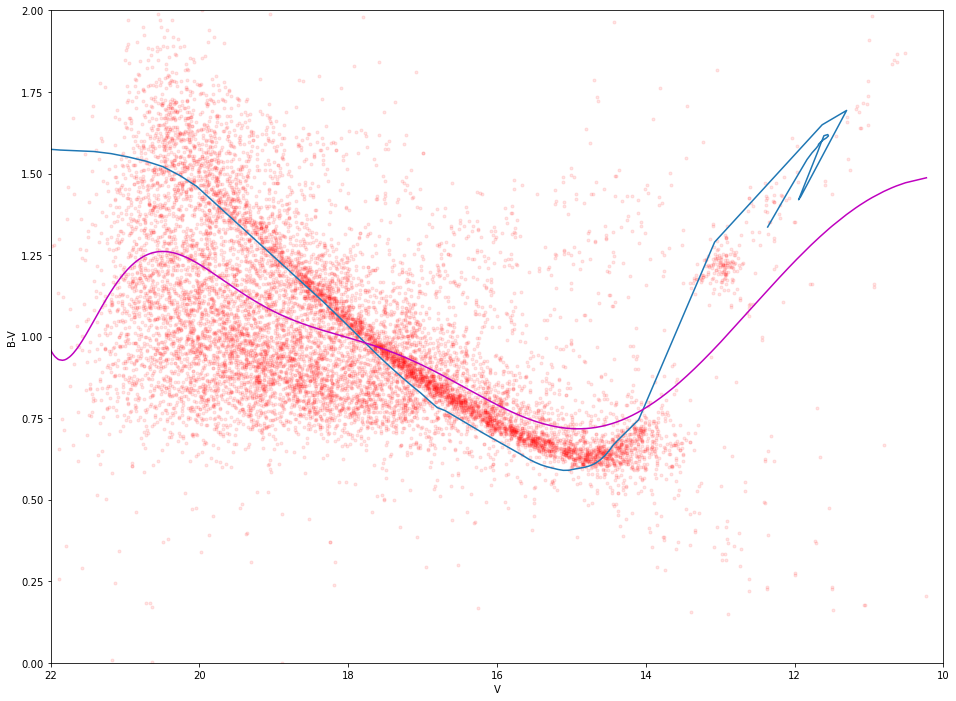

In [27]:
# same plotting code as earlier
fig, axis = plt.subplots(figsize=(16,12))
axis.plot(v,bv,'r.',alpha=0.1)
axis.invert_yaxis()
axis.set_ylabel('B-V')
axis.set_xlabel('V')

# now I plot the isochrone

# coords = get_isochrone(9.125, 2300, 0.3)
# axis.plot(coords[1], coords[0], color="g")
coords_iso = get_isochrone(log_age0, distance0, ebv0)
axis.plot(coords_iso[1], coords_iso[0])

coords_fit = create_polynomial_regression_model(3)
axis.set_xlim([22,10])
axis.set_ylim([0.0,2.0])
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(coords_fit[0], coords_fit[1]), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='m')

plt.show()